# Task 2: Model Building and Evaluation

This notebook demonstrates simple fraud detection models using Logistic Regression and Random Forest.



In [1]:
# Imports
from scripts.data_cleaning import load_data, clean_fraud_data, add_ip_features, feature_engineering, encode_and_scale, split_and_balance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Load and Preprocess Data


In [2]:
fraud_data, ip_data, credit_data = load_data(
    'data/Fraud_Data.csv',
    'data/IpAddress_to_Country.csv',
    'data/creditcard.csv'
)

fraud_data = clean_fraud_data(fraud_data)
fraud_data = add_ip_features(fraud_data, ip_data)
fraud_data = feature_engineering(fraud_data)
fraud_data = encode_and_scale(fraud_data)
X_train, y_train, X_test, y_test = split_and_balance(fraud_data)


## 2. Train Models


In [3]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]


c:\Users\Kaleb\OneDrive\Desktop\Week 8\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


## 3. Evaluate Models


Logistic Regression Results:
Confusion Matrix:
 [[21569  5824]
 [ 1074  1756]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86     27393
           1       0.23      0.62      0.34      2830

    accuracy                           0.77     30223
   macro avg       0.59      0.70      0.60     30223
weighted avg       0.89      0.77      0.81     30223

ROC-AUC Score: 0.7334872892522774


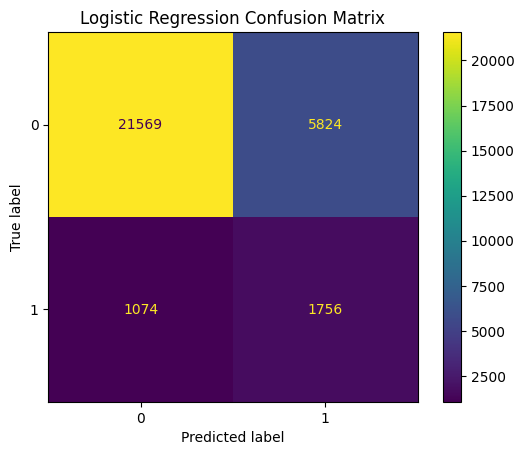


Random Forest Results:
Confusion Matrix:
 [[27235   158]
 [ 1330  1500]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     27393
           1       0.90      0.53      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.93      0.76      0.82     30223
weighted avg       0.95      0.95      0.94     30223

ROC-AUC Score: 0.7651116602872029


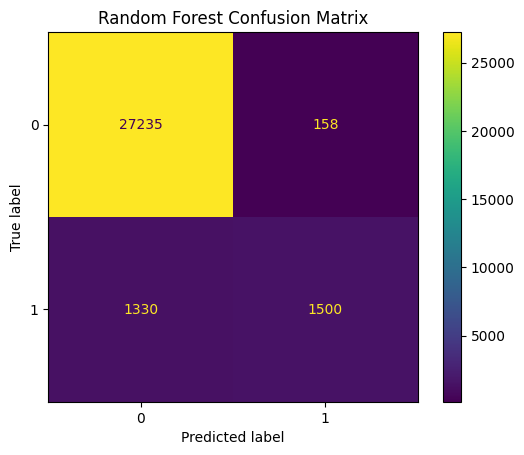

In [5]:
print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("\nRandom Forest Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Random Forest Confusion Matrix')
plt.show()
